## MNIST machine learning exercise

In this exercise we will compare the performance of three different modeling approaches at predicting handwritten numbers. 

> NOTE: The notebooks in this section are meant to be a supplement to the in-class lecture. When using this in your own analysis, you may need to modify the code to fit your specific needs and you will need to add more markdown cells to explain your process and findings. If you do not attend the lecture, you miss important information.


We use the MNIST data set;

![mnist data](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

## Load libraries

In [1]:

from __future__ import print_function
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import datasets
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier

from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

np.random.seed(5)

## Load data and explore/get to know the data structure



Load the MNIST digits dataset. It's originally from UCI machine learning library, but included in SKLearn.

In [2]:
mnist = datasets.load_digits() # sklearn includes this data set .. https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

Notice that the dataset is stored in a dictionary

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

Note thjat there are 1797 images.

In [4]:
print(len(mnist.data))

1797


Images are 8x8 grid of values epresenting the gray level for each pixel (16 levels of grey -- from 0 (black) to 15 (white)). 

In [5]:
mnist.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

To analyze this, we simple turn this into a one dimensional array (so we will x1, x2, ... x63, x64). This has already been done for us, and is stored in the data key.

In [6]:
mnist.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [7]:
print(mnist.target[0])
print(mnist.target[1])
print(mnist.target[2])
print(mnist.target[3])
print(mnist.target[4])
print(mnist.target[5])
print(mnist.target[6])

0
1
2
3
4
5
6


We can use matplotlib to display a sample of these images from the data.

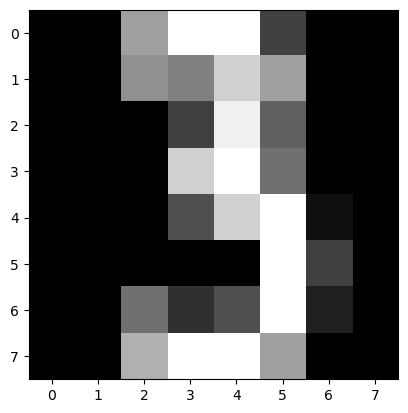

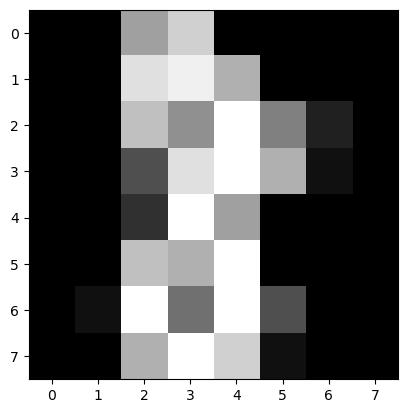

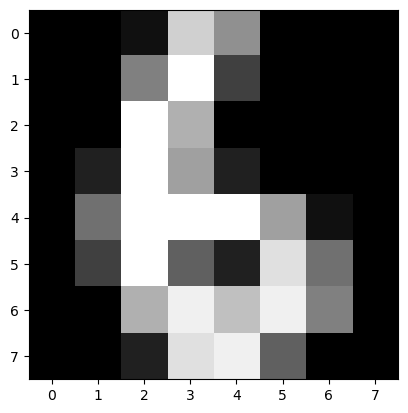

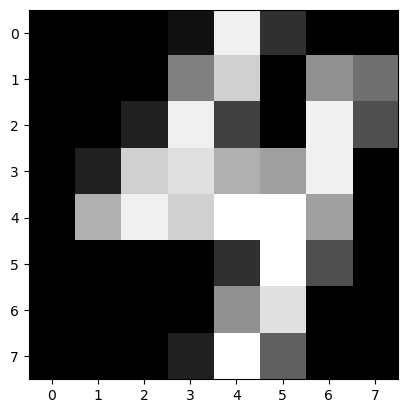

In [8]:
for i in np.random.choice(range(0,len(mnist.images)), 4): # choose 4 at random
  plt.imshow(mnist.images[i], cmap='gray')
  plt.show()

## Modeling approaches

We will compare the predictions produced by three different machine learning techniques: knn, xgboost, and neural networks.

Let's start by splitting the data into training and test partitions [ we'll use the 64 member vector/1D array]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(np.array(mnist.data), mnist.target, test_size=0.3, random_state=42)

### K-NN

In [10]:
%%time

k = round(X_train.shape[0]**0.5) # take root of number of images in training set to get k

knn = KNeighborsClassifier(n_neighbors = k)
_ = knn.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 1e+03 µs


In [11]:
%%time
%%capture --no-display

y_pred = knn.predict(X_test)

CPU times: total: 344 ms
Wall time: 106 ms


In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        53
           1       0.92      0.90      0.91        50
           2       0.90      0.96      0.93        47
           3       0.98      0.96      0.97        54
           4       0.98      0.98      0.98        60
           5       0.98      0.94      0.96        66
           6       0.98      0.98      0.98        53
           7       0.93      1.00      0.96        55
           8       0.91      0.93      0.92        43
           9       0.96      0.90      0.93        59

    accuracy                           0.96       540
   macro avg       0.95      0.96      0.95       540
weighted avg       0.96      0.96      0.96       540



### XGBoost

In [13]:
%%time
%%capture --no-display

xgb = XGBClassifier(random_state=1)
_ = xgb.fit(X_train, y_train)

CPU times: total: 4.19 s
Wall time: 234 ms


In [14]:
%%time

y_pred = xgb.predict(X_test)

CPU times: total: 93.8 ms
Wall time: 2.27 ms


In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.93      1.00      0.96        50
           2       0.98      1.00      0.99        47
           3       1.00      0.94      0.97        54
           4       0.98      0.95      0.97        60
           5       0.98      0.97      0.98        66
           6       0.98      0.96      0.97        53
           7       0.96      0.98      0.97        55
           8       0.89      0.98      0.93        43
           9       0.95      0.90      0.92        59

    accuracy                           0.96       540
   macro avg       0.96      0.97      0.96       540
weighted avg       0.97      0.96      0.96       540



### Neural Net

In [16]:
%%time

ann = MLPClassifier(hidden_layer_sizes=(60,40,20), solver='adam', max_iter=500)
ann_save = ann.fit(X_train, y_train)
s

CPU times: total: 3 s
Wall time: 604 ms


In [17]:
%%time

y_pred = ann.predict(X_test)

CPU times: total: 0 ns
Wall time: 998 µs


In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.94      0.98      0.96        50
           2       0.92      0.98      0.95        47
           3       0.98      0.94      0.96        54
           4       0.97      0.98      0.98        60
           5       0.97      0.94      0.95        66
           6       0.98      0.98      0.98        53
           7       0.98      0.98      0.98        55
           8       0.98      0.95      0.96        43
           9       0.97      0.95      0.96        59

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

